# Q3

In [2]:
import numpy as np

def chi_permute(x, M=10):
    np.random.seed(1)
    r = np.arange(x.shape[0])
    e = np.outer(x.sum(axis=1), x.sum(axis=0)) / x.sum()
    chi2Obs = np.sum((x-e)**2./e)
    count = 0
    for m in range(M):
        rStar = np.random.choice(r, replace=False, size=x.shape[0])
        xStar = x[rStar,:]
        eStar = np.outer(xStar.sum(axis=1), xStar.sum(axis=0)) / xStar.sum()
        chi2Star = np.sum((xStar-eStar)**2/eStar)
        if chi2Star > chi2Obs+10**-12:
            count += 1
    return count/M

x = np.array([[68, 119, 26, 7], 
              [20, 84, 17, 94],
              [15, 54, 14, 10],
              [5, 29, 14, 16]])
print("p value is ",  chi_permute(x))

p value is  0.0


# Q4

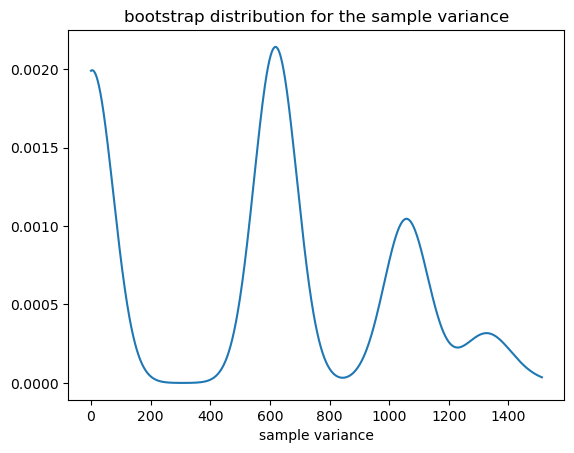

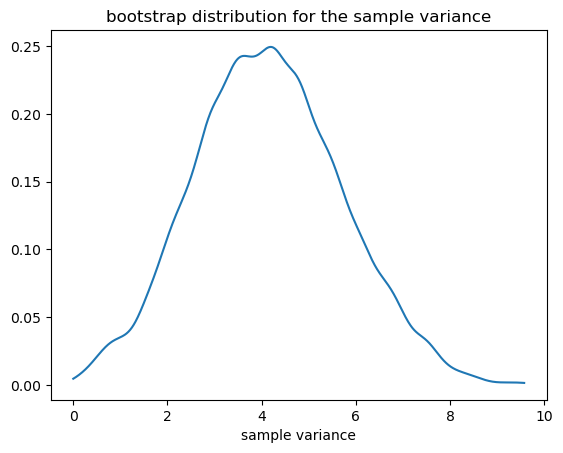

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def boot_var(x, B=10000):
    np.random.seed(1)
    n = len(x)
    out = np.zeros(B)
    for b in range(B):
        xb = np.random.choice(x, size=n, replace=True)
        out[b] = np.sum((xb - np.mean(xb))**2) / (n - 1)
    return out

# Dataset 1
x = np.array([7,9,8,13,12,9,11,80])
myBootVar = boot_var(x, 10000)
density = gaussian_kde(myBootVar)
x_vals = np.linspace(np.min(myBootVar), np.max(myBootVar), 1000)
plt.plot(x_vals, density(x_vals))
plt.xlabel('sample variance')
plt.title('bootstrap distribution for the sample variance')
plt.show()

# Dataset 2
np.random.seed(5)
x = np.array([7,9,8,13,12,9,11])
myBootVar = boot_var(x, 10000)
density = gaussian_kde(myBootVar)
x_vals = np.linspace(np.min(myBootVar), np.max(myBootVar), 1000)
plt.plot(x_vals, density(x_vals))
plt.xlabel('sample variance')
plt.title('bootstrap distribution for the sample variance')
plt.show()

  The distribution of the data is extremely unusual due to multiple peaks in the density, suggesting a significant dispersion in the data, such that it does not cluster around a central point. An anomaly that might contribute to this situation is the value of 80. This could be an outlier, possibly due to an error during data collection. By eliminating the potential outlier (80) and performing the analysis again, we can achieve a typical distribution, indicating a compliant sample variance.
